In [ ]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5c6qBsztJAC6MAeWcGPr")
project = rf.workspace("object-detection-dt-wzpc6").project("retail-objects-sku110k")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Retail-objects-sku110k-1 in yolov8:: 100%|██████████| 1746/1746 [00:00<00:00, 5893.55it/s]


In [ ]:
import os
import yaml

# 1. Search for the folder containing 'data.yaml'
dataset_location = None
for item in os.listdir('.'):
    if os.path.isdir(item) and 'data.yaml' in os.listdir(item):
        dataset_location = os.path.abspath(item)
        break

if dataset_location:
    print(f"✅ Dataset found at: {dataset_location}")

    # 2. Update data.yaml with absolute paths
    yaml_file = os.path.join(dataset_location, 'data.yaml')

    with open(yaml_file, 'r') as f:
        data = yaml.safe_load(f)

    # Force absolute path
    data['path'] = dataset_location
    data['train'] = os.path.join(dataset_location, 'train', 'images')
    data['val'] = os.path.join(dataset_location, 'valid', 'images')
    # Roboflow sometimes calls validation 'valid' or 'val', checking existence
    if not os.path.exists(data['val']):
         data['val'] = os.path.join(dataset_location, 'val', 'images')

    with open(yaml_file, 'w') as f:
        yaml.dump(data, f)

    print("✅ Configuration file updated successfully.")
else:
    print("❌ Error: Could not find the dataset folder. Did Block 1 finish?")

✅ Dataset found at: /content/Retail-objects-sku110k-1
✅ Configuration file updated successfully.


In [ ]:
# !pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load the Pre-trained Model (Transfer Learning)
model = YOLO('yolov8m.pt')

# Train using the dataset found in Block 2
if dataset_location:
    results = model.train(
        data=os.path.join(dataset_location, 'data.yaml'),
        epochs=10,        # Quick run to test
        imgsz=640,        # Image size
        batch=8,          # Batch size
        name='retail_demo',
        device=0          # Use GPU
    )
else:
    print("Please run Block 2 first to find the dataset!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Retail-objects-sku110k-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0


image 1/1 /content/Retail-objects-sku110k-1/valid/images/test_269_jpg.rf.16f41d33f630eb8487b305c29a208d4e.jpg: 640x384 108 objects, 47.8ms
Speed: 1.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


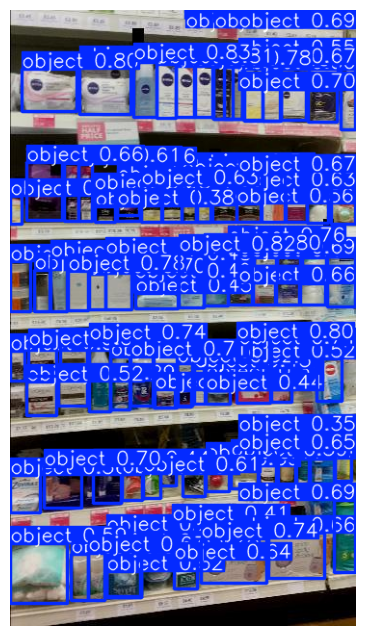

In [ ]:
import os
import random
import cv2
from matplotlib import pyplot as plt

# 1. Pick a random image from the validation set
val_img_dir = os.path.join(dataset_location, 'valid', 'images')
# Fallback if folder is named 'val' instead of 'valid'
if not os.path.exists(val_img_dir):
    val_img_dir = os.path.join(dataset_location, 'val', 'images')

random_file = random.choice(os.listdir(val_img_dir))
image_path = os.path.join(val_img_dir, random_file)

# 2. Run Inference
# conf=0.25 means we only show boxes if model is 25% sure
results = model.predict(image_path, conf=0.25)

# 3. Display the result
# YOLO saves results to an array, we plot it using matplotlib
res_plot = results[0].plot()

# Convert BGR (OpenCV) to RGB (Matplotlib)
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(res_plot, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Export the model
success = model.export(format='onnx')

print(f"✅ Model exported to: {success}")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/retail_demo/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 136ms
Prepared 6 packages in 4.23s
Installed 6 packages in 247ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.75

requirements: AutoUpdate success ✅ 5.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.75..